<a href="https://colab.research.google.com/github/ProfAI/pandas-crash/blob/main/pandas_crash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisi e manipolazione dei dati con Pandas - Crash Course
Pandas è una libreria Python appositamente sviluppata per l'analisi e la manipolazione dei dati, in questo Notebook vedremo insieme come utilizzarla con un dataset reale.<br>
Importiamo pandas con l'alias pd.

In [ ]:
import pandas as pd

## Il DataFrame
Pandas utilizza una particolare struttura dati chiamata DataFrame per rappresentare i dati in formato tabulare.

E' possibile creare un DataFrame in diversi modi, ad esempio da un dizionario, in cui ogni chiave corrisponde ad una colonna del DataFrame.

In [ ]:
data = {'altezza': [177, 181, 158, 171, 188], 'peso': [72.5, 80.2, 48.3, 56.8, 91.2], 'genere':["uomo", "uomo", "donna", "donna", "uomo"]}
df = pd.DataFrame(data)
df

,altezza,peso,genere
0,177,72.5,uomo
1,181,80.2,uomo
2,158,48.3,donna
3,171,56.8,donna
4,188,91.2,uomo


Oppure utilizzando una lista di osservazioni e (opzionalmente) una lista con i nomi delle colonne.

In [ ]:
import numpy as np

values = [[177, 72.5, "uomo"], [181, 80.2, "uomo"], [158, 48.3, "donna"], [171, 56.8, "donna"], [188, 91.2, "uomo"]]
columns = ["altezza", "peso", "genere"]
df = pd.DataFrame(values, columns=columns)
df

,altezza,peso,genere
0,177,72.5,uomo
1,181,80.2,uomo
2,158,48.3,donna
3,171,56.8,donna
4,188,91.2,uomo


Possiamo accedere ai valori di una singola colonna utilizzando il nome come chiave, il risultato sarà un'altra struttura dati di pandas chiamata Series, utilizzata per immagazzinare array monodimensiali. Un DataFrame è composto da diverse colonne di Series.

In [ ]:
Y = df['genere']
print(type(Y))
Y

<class 'pandas.core.series.Series'>


0     uomo
1     uomo
2    donna
3    donna
4     uomo
Name: genere, dtype: object

Possiamo fare la stessa cosa con un array di chiavi, in questo caso il risultato sarà sempre un DataFrame, è possibile distinguere DataFrame da Series guardando alla presenza di un header.

In [ ]:
X = df[["altezza","peso"]] 
print(type(X))
X.head()

<class 'pandas.core.frame.DataFrame'>


,altezza,peso
0,177,72.5
1,181,80.2
2,158,48.3
3,171,56.8
4,188,91.2


### Caricamento del DataFrame da csv
Pandas può caricare un dataset da diversi formati all'interno di una speciale struttura dati tabulare chiamata DataFrame.

In [ ]:
iris = pd.read_csv("https://raw.githubusercontent.com/ProfAI/ml00/master/2%20-%20Datasets%20e%20data%20preprocessing/data/iris.csv")
iris.head() #mostra le prime 5 entry del dataset
#iris.head(10) #mostra le prima 10 entry del dataset
#iris.tail() #mostra le ultime 5 entry del dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Il metodo read rileva automaticamente i nomi delle features, se questi sono specificati nella prima riga del file, e il carattere separatore (la virgola per un file CSV).
Possiamo sovrascrivere questi attributi utilizzando i parametri header, names e sep:
* **header**: Indica da quale riga del file trarre i nomi delle features
* **names**: Possiamo utilizzarlo per definire manualmente i nomi delle proprietà tramite un dizionario
* **sep**: Indica il carattere che separa le features all'interno del file.

Per vedere l'elenco delle features possiamo usare l'attributo columns

In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Utilizzando il metodo info possiamo ottenere una serie di informazioni sul DataFrame e sui tipi di dati di ogni colonna

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In quest'ultimo esempio abbiamo escluso solamente la colonna con la specie, un modo migliore di farlo sarebbe stato utilizzare l'attributo drop.

In [ ]:
X = iris.drop('species',axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**NOTA BENE** il parametro axis=1 indica di eseguire il drop lungo le colonne, che ha senso dato che vogiamo rimuovere una features.

## Selezione e modifica dei dati

Per effettuare lo slicing dei dati, ovver selezionare solo alcune righe e/o colonne di un Dataframe o Series puoi utilizzare i metodo loc o iloc. 
In passato veniva utilizzato anche il metodo ix, ma è stato deprecato a partire dalla versione 0.20 di Pandas.<br>

In [ ]:
iris.loc[10] #seleziona la riga con l'indice 10 del dataset

sepal_length       5.4
sepal_width        3.7
petal_length       1.5
petal_width        0.2
species         setosa
Name: 10, dtype: object

In [ ]:
iris.iloc[10] #seleziona la riga alla posizione 10§

sepal_length       5.4
sepal_width        3.7
petal_length       1.5
petal_width        0.2
species         setosa
Name: 10, dtype: object

Il risultato sembra essere lo stesso, quindi che differenza c'è tra loc e iloc? La differenza è sottile ma molto importante:
 - **loc** effettua la selezione utilizzando l'indice dell'osservazione
 - **iloc** effettua la selezione utilizzando l'indice della riga


Indice dell'osservazione e indice della riga non sempre sono uguali, per dimostrarlo diamo una bella shakerata al dataframe usando il metodo sample

In [ ]:
iris_sampled = iris.sample(frac=1, random_state=0) #con il parametro frac=1 mescoliamo l'intero DataFrame, per mescolare solo n valori utilizzare il parametro n
iris_sampled.head()

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
62,6.0,2.2,4.0,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa


Alla riga 0 adesso abbiamo l'osservazione 114

In [ ]:
iris_sampled.loc[114]

sepal_length          5.8
sepal_width           2.8
petal_length          5.1
petal_width           2.4
species         virginica
Name: 114, dtype: object

Mentre, trovandosi alla posizione 0 del DataFrame, per ottenerla tramite iloc dobbiamo usare l'indice 0

In [ ]:
iris_sampled.iloc[0]

sepal_length          5.8
sepal_width           2.8
petal_length          5.1
petal_width           2.4
species         virginica
Name: 114, dtype: object

Sia con loc che con iloc possiamo eseguire lo slicing

In [ ]:
iris.loc[:5]
#iris.iloc[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


e anche selezionare solo determinate colonne

In [ ]:
iris.loc[:5,'petal_length']

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
5    1.7
Name: petal_length, dtype: float64

In [ ]:
iris.loc[:5,['petal_length', 'petal_width']]

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4


Possiamo utilizzare loc ed iloc anche per modificare righe, colonne o valori singoli.

In [ ]:
iris_copy = iris.copy() #Utilizziamo copy per non modificare il DataFrame originale
iris_copy.loc[:5,'petal_length'] = 0 #Impostiamo a 0 i valori della lunghezza dei petali per le osservazioni dall'indice 0 al 5
iris_copy.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,0.0,0.2,setosa
1,4.9,3.0,0.0,0.2,setosa
2,4.7,3.2,0.0,0.2,setosa
3,4.6,3.1,0.0,0.2,setosa
4,5.0,3.6,0.0,0.2,setosa
5,5.4,3.9,0.0,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## Statistiche sui dati

Con l'attributo shape possiamo accedere alla dimensione del dataset.

In [ ]:
iris.shape

(150, 5)

Con il metodo describe possiamo ottenere alcune informazioni statistiche sul DataFrame

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [ ]:
iris.min()

sepal_length       4.3
sepal_width          2
petal_length         1
petal_width        0.1
species         setosa
dtype: object

Abbiamo anche diverse funzioni per i vari indici di posizione (es. media, mediana e moda).

In [ ]:
iris.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [ ]:
iris.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

e di dispersione (es. varianza e deviazione standard)

In [ ]:
iris.var()

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64

In [ ]:
iris.std()

sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64

Queste funzioni si applicano anche alle Series

In [ ]:
print("Massima lunghezza del petalo")
print (iris['petal_length'].max())
print("Minima lunghezza del petalo")
print (iris['petal_length'].min())
print("Lunghezza del petalo media")
print (iris['petal_length'].mean())
print("Mediana della lunghezza del petalo")
print (iris['petal_length'].median())
print("Varianza della lunghezza del petalo")
print (iris['petal_length'].var())
print("Deviazione standard della lunghezza del petalo")
print (iris['petal_length'].std())

Massima lunghezza del petalo
6.9
Minima lunghezza del petalo
1.0
Lunghezza del petalo media
3.7586666666666693
Mediana della lunghezza del petalo
4.35
Varianza della lunghezza del petalo
3.1131794183445156
Deviazione standard della lunghezza del petalo
1.7644204199522617


Come abbiamo visto la colonna *species* è composta da variabili categoriche non numeriche, che rappresentano le classi di appartenenza, per vedere quali sono le classi possiamo usere l'attributo unique sulla colonna.

In [ ]:
iris['species'].unique()
# iris['species'].nunique() #ritorna solo il conteggio

array(['setosa', 'versicolor', 'virginica'], dtype=object)

E se volessimo sapere quante osservazioni di una determinata classe ci sono? Possiamo usare value_counts

In [ ]:
iris['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

## Maschere e Filtri (Indicizzazione booleana)

Pandas da la possibilità di creare filtri sui dati applicando delle maschere ad un Dataframe.
Una maschera è un vettore di variabili booleane che funge da indicatore di quali righe selezionare e quali scartare.
Creare una maschera è semplicissimo.

In [ ]:
long_petal_mask = iris['petal_length'] > iris['petal_length'].mean() #creiamo una maschera per selezionare solo le osservazioni i cui petali sono più lunghi della media
iris_long_petals = iris[long_petal_mask] #applichiamo la maschera al dataframe e creiamo un nuovo dataframe
iris_long_petals.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


Possiamo anche usare condizioni multiple

In [ ]:
#https://stackoverflow.com/a/36922103 
long_petal_mask = (iris['petal_length'].quantile(0.25) < iris['petal_length']) & (iris['petal_length'].quantile(0.75) > iris['petal_length'])
iris_long_petals = iris[long_petal_mask] 
iris_long_petals.head()

,sepal_length,sepal_width,petal_length,petal_width,species
5,5.4,3.9,1.7,0.4,setosa
18,5.7,3.8,1.7,0.3,setosa
20,5.4,3.4,1.7,0.2,setosa
23,5.1,3.3,1.7,0.5,setosa
24,4.8,3.4,1.9,0.2,setosa


Possiamo usare le maschere anche per fare modifiche ai dati basate su condizioni.


In [ ]:
iris_copy = iris.copy() #Utilizziamo copy per non modificare il DataFrame originale
setosa_mask = iris_copy['species'] ==  'setosa' #creiamo una maschera per selezionare solo le osservazioni che appartengono alla specie setosa
iris_copy.loc[setosa_mask,'species'] = "undefined" # utilizziamo loc per applicare la maschera e sostituire la specie versicolor con undefined
iris_copy['species'].unique()

array(['undefined', 'versicolor', 'virginica'], dtype=object)

**NOTA BENE**
Utilizziamo *iris.copy()* per creare una copia del DataFrame, se avessimo utilizzato *iris_copy = iris* avremmo assegnato a iris_copy un riferimento al DataFrame iris, questo vuol dire che ogni modifica a iris_copy sarebbe stata apportata anche a iris.

# Operazioni sul dataset
E' possibile eseguire operazioni aritmetiche sul dataset. Eseguiamo una normalizzazione del dataset

In [ ]:
X = iris.drop('species',axis=1)
X_norm = (X - X.min())/(X.max()-X.min())  
X_norm.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


Utilizzando il metodo sort_values possiamo ordinare il dataframe in base al valore di una colonna.

In [ ]:
"""
ordiniamo il dataframe in base alla lunghezza dei petali in maniera ascendente,
per effetturare un ordinamento discendente bisogna utilizzare il parametro ascending = False
"""

iris.sort_values('petal_length').head()
                                      

,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa
14,5.8,4.0,1.2,0.2,setosa
35,5.0,3.2,1.2,0.2,setosa
36,5.5,3.5,1.3,0.2,setosa


Possiamo raggruppare un DataFrame per determinati valori o condizioni utilizzando il metodo groupby

In [ ]:
grouped_species = iris.groupby(['species']) # Eseguiamo un raggruppamento per specie
grouped_species.mean() # Mostriamo la media delle features per ogni specie 

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


Un problema tipico è quello di avere valori numerici invalidi o mancanti all'interno di un dataset. Utilizzando pandas è possibile correggere facilmente questo problema.
Per prima cosa creiamo casualmente dieci valori non validi all'interno del DataFrame.

In [ ]:
import numpy as np

iris_nan = iris.copy()  #Utilizziamo copy per non modificare il DataFrame originale

max_val = iris.shape[0]
samples = np.random.randint(max_val, size=(10)) #Creiamo un vettore di 10 numeri casuali tra 0 ed il numero di osservazioni

iris_nan.loc[samples,'petal_length']=None #Sostituiamo il valore di "petal_length" per ognuna delle 10 osservazioni con un valore non valido

iris_nan['petal_length'].isnull().sum() #contiamo il numero di valori non validi all'interno della colonna "petal_legnth"

10

In [ ]:
iris_nan.shape

(150, 5)

Adesso il nostro DataFrame presenta 10 valori non validi per la lunghezza del petalo, con il metodo drona possiamo rimuovere le righe che contengono questi valori

In [ ]:
iris_drop_nan = iris_nan.dropna()
iris_drop_nan.shape

(140, 5)

Oppure possiamo rimpiazzare i valori non validi con la lunghezza media del petalo utilizzando il metodo fillna

In [ ]:
mean_petal_length = iris_nan['petal_length'].mean()
iris_nan['petal_length'].fillna(mean_petal_length, inplace=True)
iris_nan['petal_length'].isnull().sum() #verifichiamo che la colonna petal_length non contenga più valori non validi.

0

E' possibile effettuare operazioni su righe e colonne utilizzando il metodo apply. Il primo argomento deve essere la funzione da applicare, che può essere una funzione python, una funzione definita dall'utente o una funzione di una libreria esterna.

In [ ]:
iris.apply(np.count_nonzero, axis=1).head() # contiamo i valori differenti da zero per riga

0    5
1    5
2    5
3    5
4    5
dtype: int64

In [ ]:
iris.apply(np.count_nonzero, axis=0).head() # contiamo i valori differenti da zero per colonna

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [ ]:
X = iris.drop('species',axis=1)
X.apply(np.sum, axis=0).head()

sepal_length    876.5
sepal_width     458.1
petal_length    563.8
petal_width     179.8
dtype: float64

In [ ]:
def sum(arr):
  # arr è un array numpy
  return arr.sum()

X.apply(sum, axis=0).head()

sepal_length    876.5
sepal_width     458.1
petal_length    563.8
petal_width     179.8
dtype: float64

In [ ]:
def mean(arr):
  # arr è un array numpy
  return np.around(arr.sum()/arr.size, 2)

X.apply(mean, axis=0).head()

sepal_length    5.86
sepal_width     3.03
petal_length    3.79
petal_width     1.10
dtype: float64

Per applicare una funzione elemento per elemento possiamo usare il metodo applymap

In [ ]:
def to_nearest_int(val):
  #Arrotondiamo il valore all'intero più vicino
  return int(round(val,0))

X = X.applymap(to_nearest_int)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5,4,1,0
1,5,3,1,0
2,5,3,1,0
3,5,3,2,0
4,5,4,1,0


Piuttosto che definire una funzione, possiamo sfruttare le funzioni lambda (a.k.a funzioni anonime)

In [ ]:
X = X.applymap(lambda val:int(round(val,0)))# Arrotondiamo i valori all'intero più vicino
X.head()

## Visualizzazioni
Possiamo servirci di matplotlib per creare grafici e visualizzazioni in maniera semplice utilizzando DataFrame e Series.
Costruiamo un grafico di dispersione (scatter plot) che mostra la relazione tra lunghezza del sepalo e larghezza del petalo

In [ ]:
import matplotlib.pyplot as plt

"""
l'istruzione che segue indica a jupyter
di visualizzare il grafico all'interno del Notebook
"""
%matplotlib inline

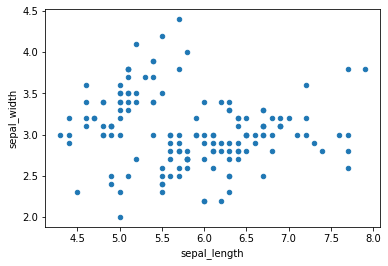

In [ ]:
iris.plot(kind="scatter", x='sepal_length',y='sepal_width')

Creiamo ora un grafico a barre (bar plot), per farlo raggruppiamo le osservazioni per specie e calcoliamo la media.

In [ ]:
grouped_species = iris.groupby(['species'])
df_species = grouped_species.mean()

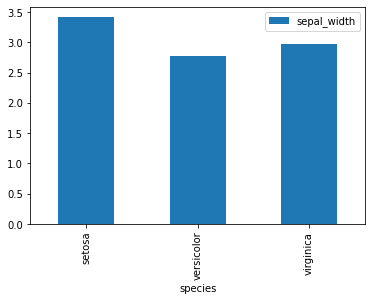

In [ ]:
df_species.plot(kind="bar", y='sepal_width')

In [ ]:
days = 365
df = pd.DataFrame(np.random.randn(days, 4), index=pd.date_range("1/1/2020", periods=days), columns=["ProfessionAI", "Apple", "Google", "Facebook"])
df.head()

,ProfessionAI,Apple,Google,Facebook
2020-01-01,-1.207413,-0.251530,-1.397817,-0.090778
2020-01-02,1.011259,1.857440,-0.911422,-0.190430
2020-01-03,-0.999531,-0.880076,0.095328,1.189068
2020-01-04,0.914764,-0.020914,0.432670,-0.450505
2020-01-05,2.056336,0.112838,0.675624,0.821380


In [ ]:
df = df.cumsum()
df.head()

,ProfessionAI,Apple,Google,Facebook
2020-01-01,-1.207413,-0.251530,-1.397817,-0.090778
2020-01-02,-0.196154,1.605909,-2.309239,-0.281208
2020-01-03,-1.195685,0.725833,-2.213911,0.907860
2020-01-04,-0.280921,0.704919,-1.781241,0.457355
2020-01-05,1.775415,0.817758,-1.105617,1.278736


In [ ]:
df+=abs(df.min().min())+8
df.head()

,ProfessionAI,Apple,Google,Facebook
2020-01-01,25.123921,26.079804,24.933518,26.240556
2020-01-02,26.135181,27.937244,24.022096,26.050126
2020-01-03,25.135649,27.057168,24.117424,27.239195
2020-01-04,26.050413,27.036254,24.550094,26.788690
2020-01-05,28.106749,27.149092,25.225718,27.610070


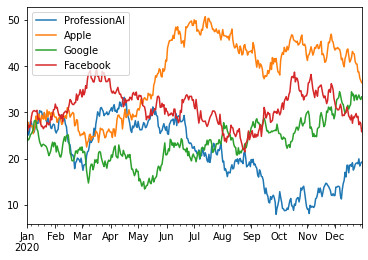

In [ ]:
df.plot()

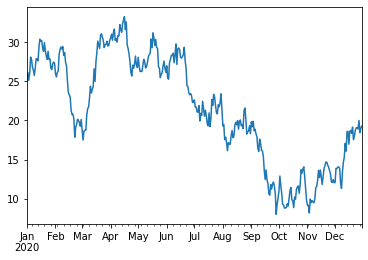

In [ ]:
df["ProfessionAI"].plot()

## Da Pandas a Numpy
https://www.geeksforgeeks.org/difference-between-pandas-vs-numpy/

In [ ]:
data = {'altezza': [177, 181, 158, 171, 188], 'peso': [72.5, 80.2, 48.3, 56.8, 91.2], 'genere':["uomo", "uomo", "donna", "donna", "uomo"]}
df = pd.DataFrame(data)

In [ ]:
heights = df["altezza"].values
type(heights)

numpy.ndarray

In [ ]:
genders = df["genere"].values
type(genders)

numpy.ndarray